In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [166]:
plt.rcParams.update({'font.size': 15})

In [3]:
pred_path = r'C:\Users\jv97\Desktop\github\Neutrino-Machine-Learning\predictions'

In [93]:
# df_truth = pd.read_csv(os.path.join(pred_path,'OscNext_truth_retro_test_predictions.csv'))
# df_pred = pd.read_csv(os.path.join(pred_path,'OscNext_EAngle_m27_2kql_test_predictions.csv'))
df_data = pd.read_csv(os.path.join(pred_path,'OscNext_EAngle_m27_2kql_data_predictions.csv'))
df_MC = pd.read_csv(os.path.join(pred_path,'OscNext_EAngle_m27_2kql_retro_test_predictions.csv'))
# df_3 = pd.read_csv(os.path.join(pred_path,'OscNext_EAngle_m27_2kql_test_predictions.csv'))

In [6]:
df_MC.columns

Index(['Unnamed: 0', 'event_no', 'energy_log10', 'azimuth', 'zenith',
       'energy_log10_retro', 'azimuth_retro', 'zenith_retro',
       'energy_log10_sigma', 'azimuth_sigma', 'zenith_sigma', 'x', 'y', 'z',
       'energy_log10_pred', 'solid_angle', 'azimuth_pred', 'zenith_pred',
       'x_pred', 'y_pred', 'z_pred', 'energy_log10_sig', 'x_sig', 'y_sig',
       'z_sig', 'solid_angle_sig', 'azimuth_sig', 'zenith_sig'],
      dtype='object')

In [16]:
np.quantile(df_MC.solid_angle,(0.16,0.5,0.68))*180/np.pi

array([11.97699495, 32.84126492, 47.74105918])

In [113]:
def binc(x):
    return 0.5*(x[1:] + x[:-1])

def draw_contour(x,y,ax,levels=10,cmap='plasma',bins=100,q_min=0.01,q_max=0.99):
    x_min, x_max = np.quantile(x,(q_min,q_max))
    y_min, y_max = np.quantile(y,(q_min,q_max))
    
    vals, binx, biny = np.histogram2d(x,y,bins=bins,range=((x_min,x_max),(y_min,y_max)))
    
#     Xe,Ye = np.meshgrid(binx,biny)
#     ax.pcolormesh(Xe,Ye,vals,cmap=cmap)
    ax.hist2d(x,y,bins=bins,range=((x_min,x_max),(y_min,y_max)))
    
#     Xc,Yc = np.meshgrid(binc(binx),binc(biny))
#     ax.contour(Xc,Yc,vals,levels=levels,cmap=cmap)
    

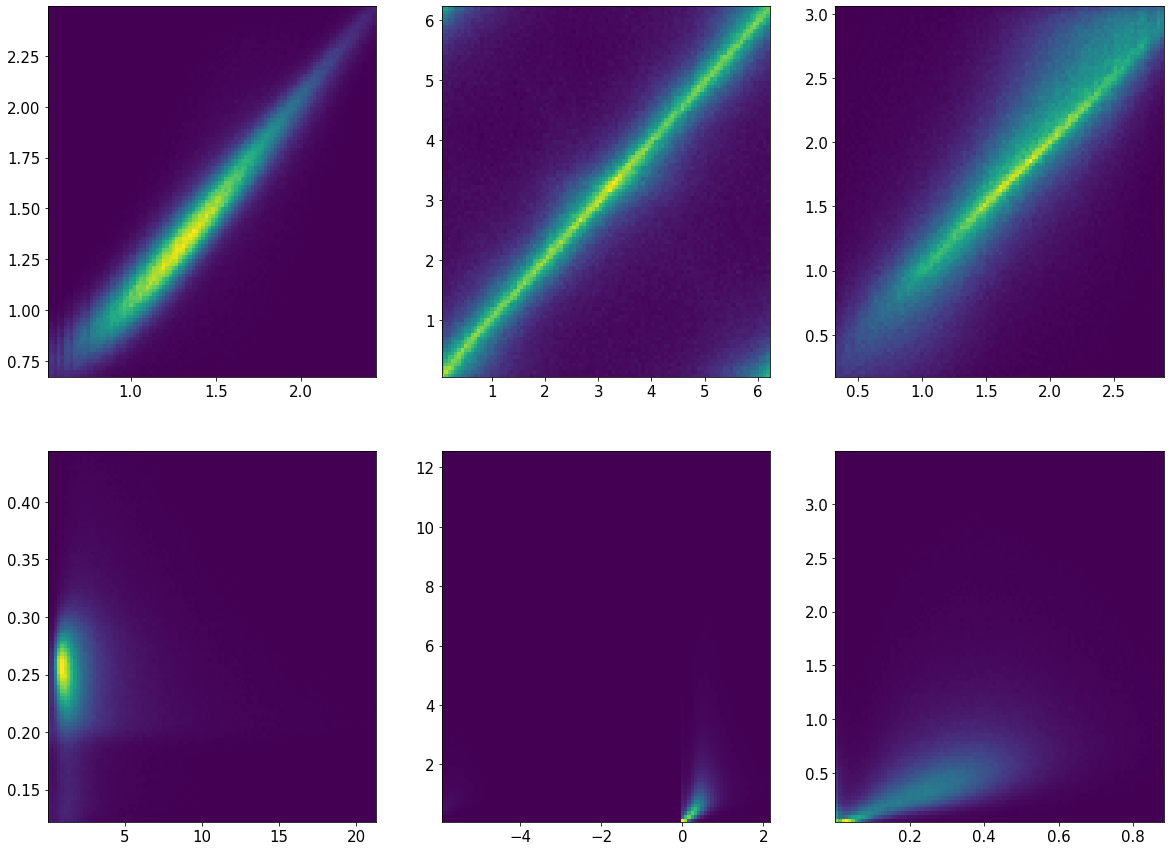

In [114]:
data_cmap = 'spring'
MC_cmap = 'winter'

fig, ax = plt.subplots(figsize=(20,15),ncols=3,nrows=2)
ax = ax.flatten()

draw_contour(df_MC.energy_log10_retro,df_MC.energy_log10_pred,ax[0],cmap=MC_cmap)
# draw_contour(df_data.energy_log10_retro[mask],df_data.energy_log10_pred[mask],ax[0],cmap=data_cmap)

draw_contour(df_MC.azimuth_retro,df_MC.azimuth_pred,ax[1],cmap=MC_cmap)
# draw_contour(df_data.azimuth_retro[mask],df_data.azimuth_pred[mask],ax[1],cmap=data_cmap)

draw_contour(df_MC.zenith_retro,df_MC.zenith_pred,ax[2],cmap=MC_cmap)
# draw_contour(df_data.zenith_retro[mask],df_data.zenith_pred[mask],ax[2],cmap=data_cmap)

draw_contour(df_MC.energy_log10_sigma,df_MC.energy_log10_sig,ax[3],cmap=MC_cmap)
# draw_contour(df_data.energy_log10_sigma[mask],df_data.energy_log10_sig[mask],ax[3],cmap=data_cmap)

draw_contour(df_MC.azimuth_sigma,df_MC.azimuth_sig,ax[4],cmap=MC_cmap)
# draw_contour(df_data.azimuth_sigma[mask],df_data.azimuth_sig[mask],ax[4],cmap=data_cmap,range=Range)

draw_contour(df_MC.zenith_sigma,df_MC.zenith_sig,ax[5],cmap=MC_cmap)
# draw_contour(df_data.zenith_sigma[mask],df_data.zenith_sig[mask],ax[5],cmap=data_cmap)

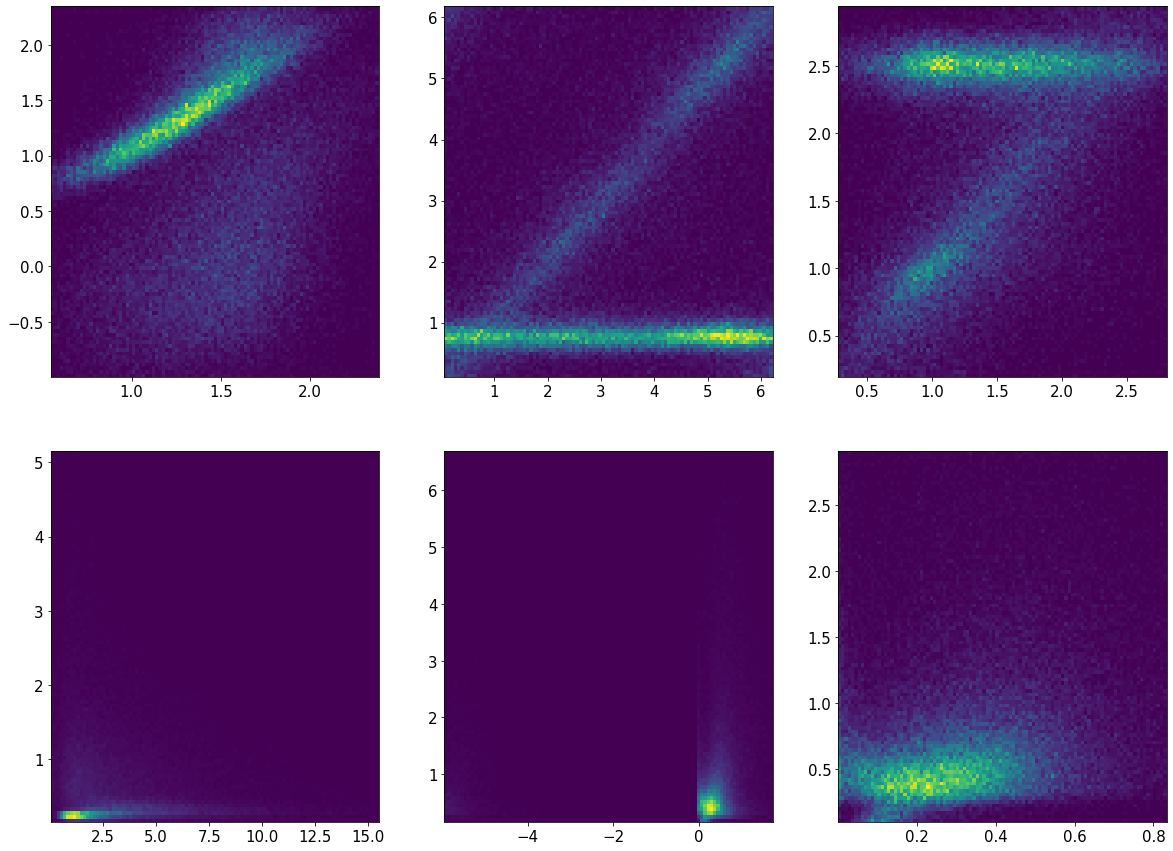

In [94]:
fig, ax = plt.subplots(figsize=(20,15),ncols=3,nrows=2)
ax = ax.flatten()

# draw_contour(df_MC.energy_log10_retro,df_MC.energy_log10_pred,ax[0])
draw_contour(df_data.energy_log10_retro,df_data.energy_log10_pred,ax[0],cmap='viridis')

# mask = df_data.azimuth_sig < np.quantile(df_data.azimuth_sig,0.1)
draw_contour(df_data.azimuth_retro,df_data.azimuth_pred,ax[1],cmap='viridis')

draw_contour(df_data.zenith_retro,df_data.zenith_pred,ax[2],cmap='viridis')


draw_contour(df_data.energy_log10_sigma,df_data.energy_log10_sig,ax[3],cmap='viridis',q_max=0.98)

# mask = df_data.azimuth_sig < np.quantile(df_data.azimuth_sig,0.1)
draw_contour(df_data.azimuth_sigma,df_data.azimuth_sig,ax[4],cmap='viridis',q_max=0.98)

draw_contour(df_data.zenith_sigma,df_data.zenith_sig,ax[5],cmap='viridis',q_max=0.98)

In [95]:
mask = df_data.good_event

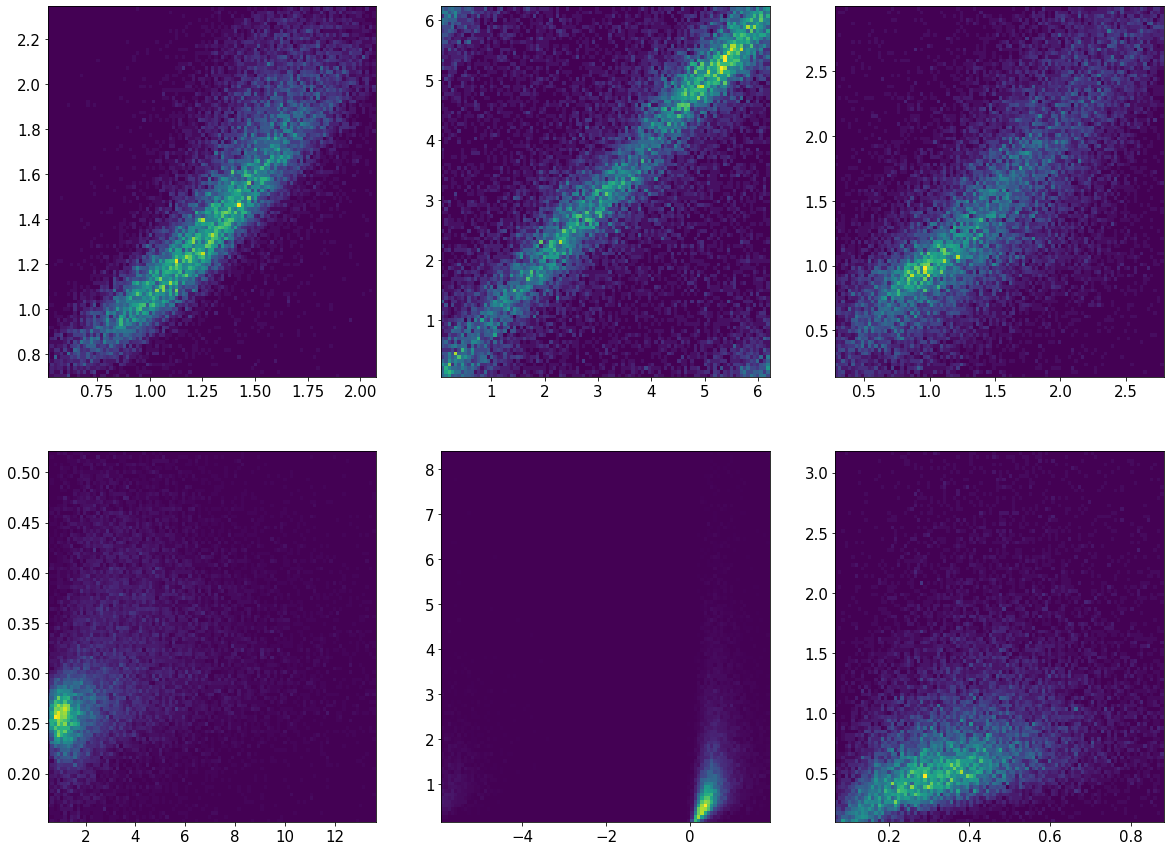

In [96]:
fig, ax = plt.subplots(figsize=(20,15),ncols=3,nrows=2)
ax = ax.flatten()

# draw_contour(df_MC.energy_log10_retro,df_MC.energy_log10_pred,ax[0])
draw_contour(df_data.energy_log10_retro[mask],df_data.energy_log10_pred[mask],ax[0],cmap='viridis')

# mask = df_data.azimuth_sig < np.quantile(df_data.azimuth_sig,0.1)
draw_contour(df_data.azimuth_retro[mask],df_data.azimuth_pred[mask],ax[1],cmap='viridis')

draw_contour(df_data.zenith_retro[mask],df_data.zenith_pred[mask],ax[2],cmap='viridis')


draw_contour(df_data.energy_log10_sigma[mask],df_data.energy_log10_sig[mask],ax[3],cmap='viridis',q_max=0.98)

# mask = df_data.azimuth_sig < np.quantile(df_data.azimuth_sig,0.1)
draw_contour(df_data.azimuth_sigma[mask],df_data.azimuth_sig[mask],ax[4],cmap='viridis',q_max=0.98)

draw_contour(df_data.zenith_sigma[mask],df_data.zenith_sig[mask],ax[5],cmap='viridis',q_max=0.98)

In [174]:
def draw_contour(x,y,ax,levels=5,cmap='plasma',bins=50,alpha=1,q_min=0.05,q_max=0.95,range=None):
    x_min, x_max = np.quantile(x,(q_min,q_max))
    y_min, y_max = np.quantile(y,(q_min,q_max))
    
    
    if range is None:
        range = ((x_min,x_max),(y_min,y_max))
    vals, binx, biny = np.histogram2d(x,y,bins=bins,range=range)
    
#     Xe,Ye = np.meshgrid(binx,biny)
#     ax.pcolormesh(Xe,Ye,vals,cmap=cmap)
#     ax.hist2d(x,y,bins=bins,range=((x_min,x_max),(y_min,y_max)))
    
    Xc,Yc = np.meshgrid(binc(binx),binc(biny))
#     ax.contour(Xc,Yc,vals.T,levels=levels,cmap=cmap,alpha=alpha)
    ax.contour(Xc,Yc,vals.T,levels=levels,colors=cmap,alpha=alpha)
    return range
    

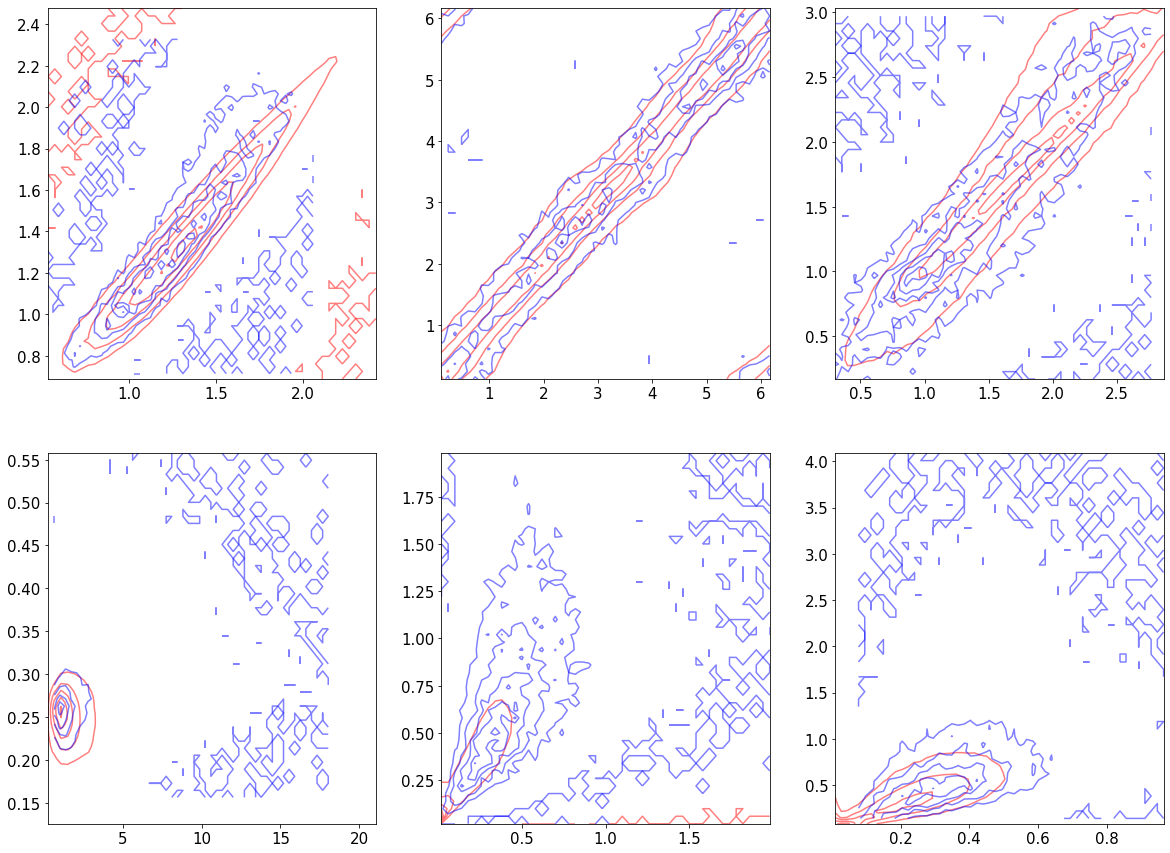

In [118]:
data_cmap = 'blue'
MC_cmap = 'red'

fig, ax = plt.subplots(figsize=(20,15),ncols=3,nrows=2)
ax = ax.flatten()

draw_contour(df_MC.energy_log10_retro,df_MC.energy_log10_pred,ax[0],cmap=MC_cmap)
draw_contour(df_data.energy_log10_retro[mask],df_data.energy_log10_pred[mask],ax[0],cmap=data_cmap)

draw_contour(df_MC.azimuth_retro,df_MC.azimuth_pred,ax[1],cmap=MC_cmap)
draw_contour(df_data.azimuth_retro[mask],df_data.azimuth_pred[mask],ax[1],cmap=data_cmap)

draw_contour(df_MC.zenith_retro,df_MC.zenith_pred,ax[2],cmap=MC_cmap)
draw_contour(df_data.zenith_retro[mask],df_data.zenith_pred[mask],ax[2],cmap=data_cmap)

draw_contour(df_MC.energy_log10_sigma,df_MC.energy_log10_sig,ax[3],cmap=MC_cmap)
draw_contour(df_data.energy_log10_sigma[mask],df_data.energy_log10_sig[mask],ax[3],cmap=data_cmap)

Range = ((0,2),(0,2))
draw_contour(df_MC.azimuth_sigma,df_MC.azimuth_sig,ax[4],cmap=MC_cmap,range=Range)
draw_contour(df_data.azimuth_sigma[mask],df_data.azimuth_sig[mask],ax[4],cmap=data_cmap,range=Range)

draw_contour(df_MC.zenith_sigma,df_MC.zenith_sig,ax[5],cmap=MC_cmap)
draw_contour(df_data.zenith_sigma[mask],df_data.zenith_sig[mask],ax[5],cmap=data_cmap)

In [168]:
plt.rcParams.update({'font.size': 20})

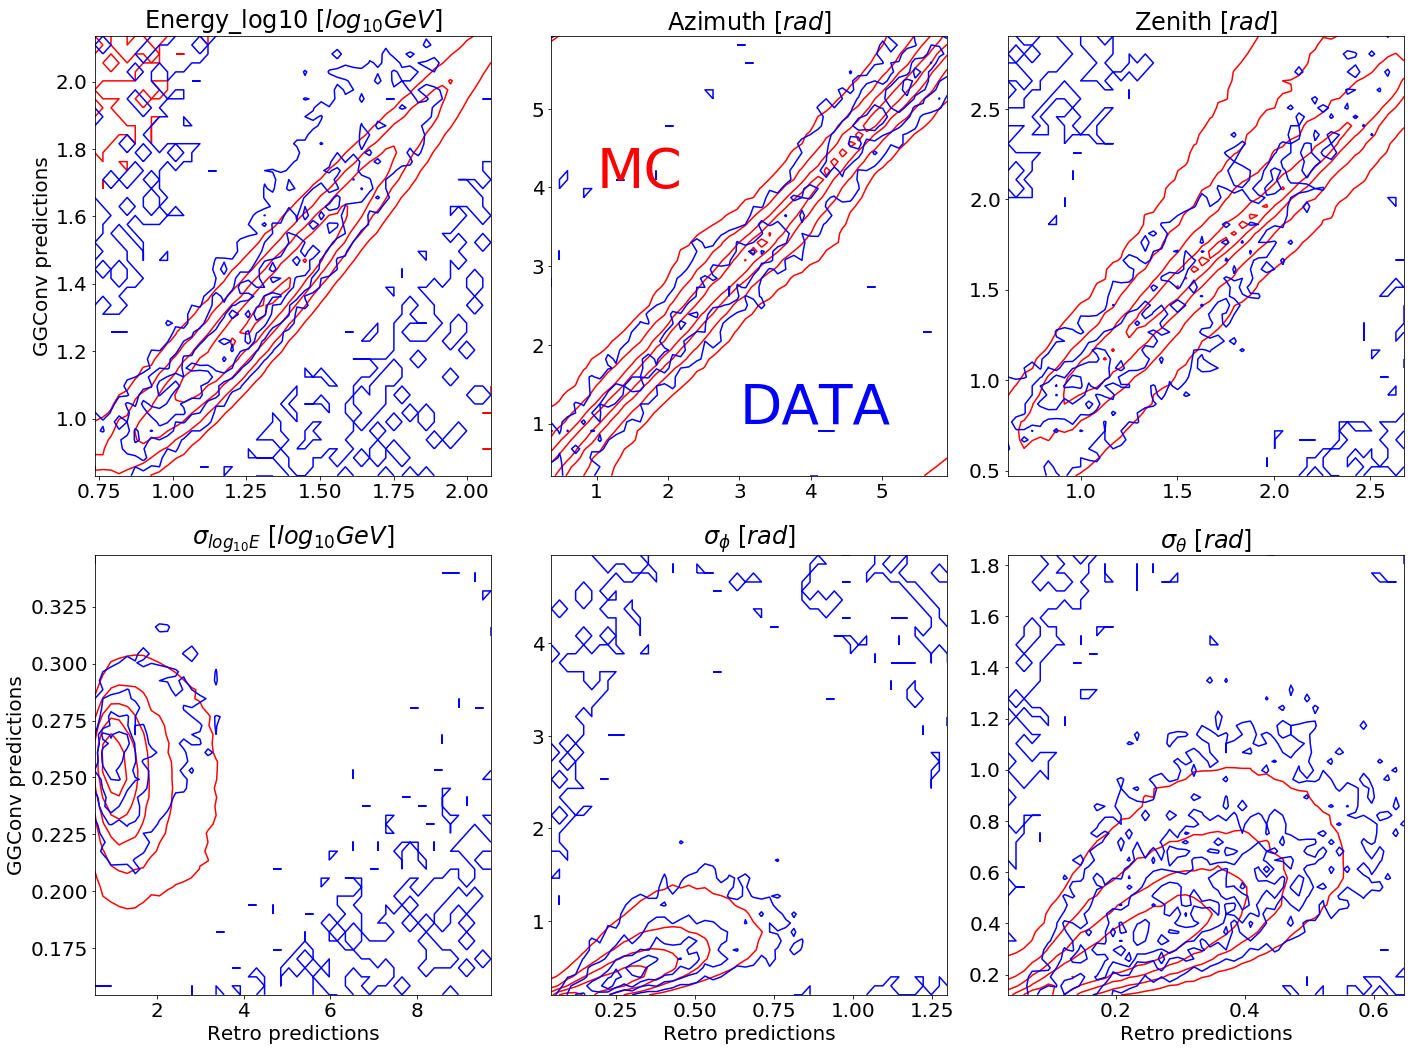

In [175]:
data_cmap = 'blue'
MC_cmap = 'red'

fig, ax = plt.subplots(figsize=(20,15),ncols=3,nrows=2)
ax = ax.flatten()

ax[0].set_title("Energy_log10 $[log_{10}GeV]$")
ax[0].set_ylabel("GGConv predictions")
Range = draw_contour(df_MC.energy_log10_retro,df_MC.energy_log10_pred,ax[0],cmap=MC_cmap)
draw_contour(df_data.energy_log10_retro[mask],df_data.energy_log10_pred[mask],ax[0],cmap=data_cmap,range=Range)

ax[1].set_title("Azimuth $[rad]$")
ax[1].text(1,4,'MC',c=MC_cmap,fontsize=55)
ax[1].text(3,1,'DATA',c=data_cmap,fontsize=55)
Range = draw_contour(df_MC.azimuth_retro,df_MC.azimuth_pred,ax[1],cmap=MC_cmap)
draw_contour(df_data.azimuth_retro[mask],df_data.azimuth_pred[mask],ax[1],cmap=data_cmap,range=Range)

ax[2].set_title("Zenith $[rad]$")
Range = draw_contour(df_MC.zenith_retro,df_MC.zenith_pred,ax[2],cmap=MC_cmap)
draw_contour(df_data.zenith_retro[mask],df_data.zenith_pred[mask],ax[2],cmap=data_cmap,range=Range)

ax[3].set_title("$\sigma_{log_{10}E}$ $[log_{10}GeV]$")
ax[3].set_xlabel("Retro predictions")
ax[3].set_ylabel("GGConv predictions")
Range = draw_contour(df_MC.energy_log10_sigma,df_MC.energy_log10_sig,ax[3],cmap=MC_cmap)
draw_contour(df_data.energy_log10_sigma[mask],df_data.energy_log10_sig[mask],ax[3],cmap=data_cmap,range=Range)

ax[4].set_title("$\sigma_{\phi}$ $[rad]$")
ax[4].set_xlabel("Retro predictions")
Range = None#((0,2),(0,2))
Range = draw_contour(df_MC.azimuth_sigma[df_MC.azimuth_sigma>=0],df_MC.azimuth_sig[df_MC.azimuth_sigma>=0],ax[4],cmap=MC_cmap,range=Range)
draw_contour(df_data.azimuth_sigma[mask&(df_data.azimuth_sigma>=0)],df_data.azimuth_sig[mask&(df_data.azimuth_sigma>=0)],ax[4],cmap=data_cmap,range=Range)

ax[5].set_title("$\sigma_{\\theta}$ $[rad]$")
ax[5].set_xlabel("Retro predictions")
Range = draw_contour(df_MC.zenith_sigma,df_MC.zenith_sig,ax[5],cmap=MC_cmap)
draw_contour(df_data.zenith_sigma[mask],df_data.zenith_sig[mask],ax[5],cmap=data_cmap,range=Range)

fig.tight_layout()

In [176]:
# fig.savefig("plots/retro_GGConv_corr.pdf")

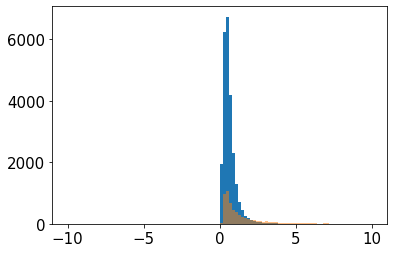

In [161]:
fig, ax = plt.subplots()
ax.hist(df_data.azimuth_sigma[mask&(df_data.azimuth_sigma>0)],bins=100,range=(-10,10));
ax.hist(df_data.azimuth_sig[df_data.azimuth_sigma<0],bins=100,alpha=0.5,range=(-10,10));

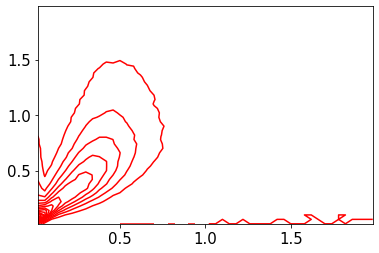

In [150]:
fig, ax = plt.subplots()
draw_contour(df_MC.azimuth_sigma,df_MC.azimuth_sig,ax,cmap=MC_cmap,range=((0,2),(0,2)),levels=20)

In [ ]:
df_MC.zenith_pred - df_MC.zenith

In [75]:
df_data.azimuth_sigma

0        1.625251
1        0.196073
2        0.000181
3        0.055432
4       -5.537270
           ...   
63796    0.789493
63797    0.299164
63798    0.121434
63799    1.223577
63800    0.179546
Name: azimuth_sigma, Length: 63801, dtype: float64

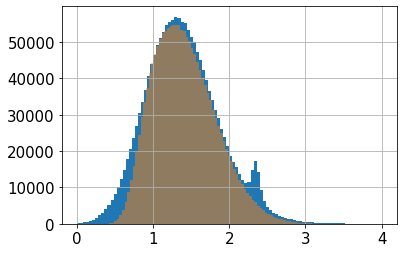

In [81]:
df_MC.energy_log10.hist(bins=100)
df_MC.energy_log10_pred.hist(bins=100,alpha=0.5)

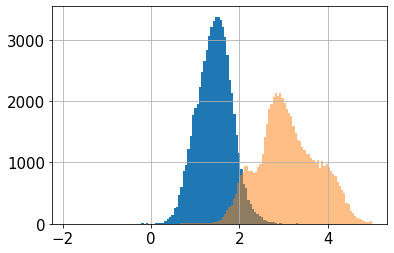

In [79]:
df_data.energy_log10_retro.hist(bins=100)
df_data.energy_log10_pred.hist(bins=100,alpha=0.5,range=(0,5))

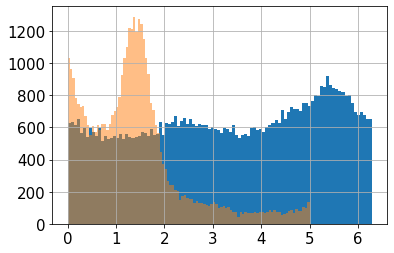

In [82]:
df_data.azimuth_retro.hist(bins=100)
df_data.azimuth_pred.hist(bins=100,alpha=0.5,range=(0,5))

In [89]:
df_data.azimuth_sigma.min()

-6.28217096728622

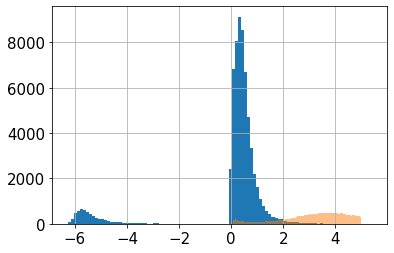

In [87]:
df_data.azimuth_sigma.hist(bins=100)
df_data.azimuth_sig.hist(bins=100,alpha=0.5,range=(-1,5))

In [92]:
df_data

,Unnamed: 0,event_no,energy_log10_retro,azimuth_retro,zenith_retro,energy_log10_sigma,azimuth_sigma,zenith_sigma,energy_log10_pred,azimuth_pred,zenith_pred,x_pred,y_pred,z_pred,energy_log10_sig,x_sig,y_sig,z_sig,good_event
0,0,90.0,0.909128,3.815409,0.947286,1.785697,0.553776,0.342929,0.858052,3.268856,1.755739,-0.130925,-0.016753,-0.024693,0.325754,0.631696,0.536890,0.582374,True
1,1,98.0,0.742800,4.993557,1.586630,2.139792,0.251379,0.245054,0.199345,1.015062,2.080452,0.410217,0.660549,-0.434584,2.810288,0.349724,0.385661,0.811522,False
2,2,139.0,1.127165,4.124789,0.788409,3.552396,1.050714,0.669240,1.217728,3.530344,0.434972,-0.217263,-0.088990,0.505286,0.346220,0.526993,0.519507,0.390700,True
3,3,159.0,0.899219,0.315706,1.863147,0.011055,0.176980,0.012673,-0.568755,0.790188,2.526347,0.543225,0.548454,-1.092234,2.285593,0.337127,0.465110,14.634922,False
4,4,273.0,1.470046,4.040510,1.122103,3.804704,0.491855,0.794374,-0.192041,0.776991,2.464711,0.614817,0.604565,-1.073113,0.747953,0.271245,0.291410,0.738337,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63796,63796,116100847.0,1.501720,5.320151,1.260981,1.348969,0.154709,0.058207,0.092727,0.776889,2.429141,0.607995,0.597735,-0.987046,0.808729,0.269605,0.342676,0.748177,False
63797,63797,116101082.0,1.051003,0.053895,1.851692,0.879568,-5.468865,0.139893,0.312226,0.838113,2.403084,0.494308,0.549376,-0.811793,1.660686,0.418355,0.416803,1.004937,False
63798,63798,116101363.0,0.744140,0.887371,1.110007,0.724646,0.568227,0.399715,1.118490,3.332618,2.812747,-0.052759,-0.010203,-0.157477,0.470266,0.520903,0.610033,0.564470,False
63799,63799,116101468.0,1.820790,2.120899,1.211279,3.942974,0.176872,0.090187,1.864376,1.985704,1.159130,-0.347191,0.788214,0.376052,0.338153,0.254035,0.181408,0.238684,False


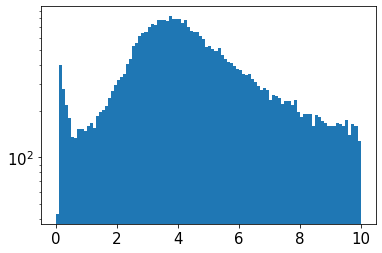

In [62]:
fig, ax = plt.subplots()
ax.hist(df_data.azimuth_sig,bins=100,range=(0,10)),
ax.set_yscale('log')

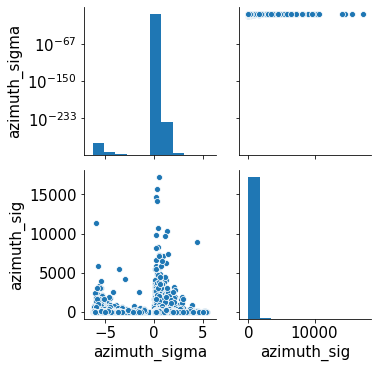

In [58]:
import seaborn as sbn
sbn.pairplot(df_data[['azimuth_sigma','azimuth_sig']])

In [41]:
df_data.max(0)

Unnamed: 0            6.380000e+04
event_no              1.161016e+08
energy_log10_retro    3.324368e+00
azimuth_retro         6.283147e+00
zenith_retro          3.133351e+00
energy_log10_sigma    9.921139e+02
azimuth_sigma         5.400743e+00
zenith_sigma          2.149497e+00
energy_log10_pred     3.156074e+02
azimuth_pred          6.283131e+00
zenith_pred           3.140994e+00
x_pred                4.798796e+01
y_pred                5.718616e+01
z_pred                6.484734e+01
energy_log10_sig      3.161950e+02
x_sig                 2.495065e+02
y_sig                 3.162277e+02
z_sig                 3.162278e+02
azimuth_sig           1.723812e+04
zenith_sig            1.017518e+03
dtype: float64

In [51]:
Xc

array([[-1.86650195, -1.8143324 , -1.76216285, ...,  3.19394441,
         3.24611396,  3.29828351],
       [-1.86650195, -1.8143324 , -1.76216285, ...,  3.19394441,
         3.24611396,  3.29828351],
       [-1.86650195, -1.8143324 , -1.76216285, ...,  3.19394441,
         3.24611396,  3.29828351],
       ...,
       [-1.86650195, -1.8143324 , -1.76216285, ...,  3.19394441,
         3.24611396,  3.29828351],
       [-1.86650195, -1.8143324 , -1.76216285, ...,  3.19394441,
         3.24611396,  3.29828351],
       [-1.86650195, -1.8143324 , -1.76216285, ...,  3.19394441,
         3.24611396,  3.29828351]])

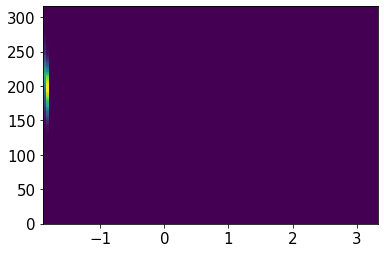

In [50]:
def binc(x):
    return 0.5*(x[1:] + x[:-1])

vals, binx, biny = np.histogram2d(df_data.energy_log10_retro,df_data.energy_log10_pred,bins=100)
Xe,Ye = np.meshgrid(binx,biny)
Xc,Yc = np.meshgrid(binc(binx),binc(biny))

fig, ax = plt.subplots()
ax.pcolormesh(Xe,Ye,vals,alpha=1)
# ax.contour(Xc,Yc,vals,levels=10,cmap='plasma')

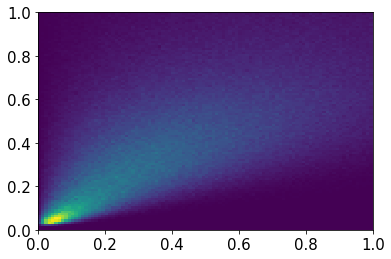

In [11]:
fig, ax = plt.subplots()
ax.hist2d(df_MC.solid_angle,df_MC.solid_angle_sig,bins=100,range=((0,1),(0,1)));

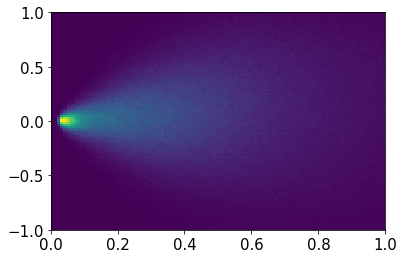

In [99]:
fig, ax = plt.subplots()
ax.hist2d(df_MC.zenith_sig,df_MC.zenith_pred - df_MC.zenith,bins=100,range=((0,1),(-1,1)));